# Proyecto 1 - Analítica de textos 
## Análisis de sentimientos en películas

### Integrantes:
- Daniel Aguilera
- Vanessa Martínez
- Cristian Sánchez

### Descripción del problema
El objetivo de este notebook es realizar el desarrollo de la etapa 2 para el cual, se llevara acabo el analisis de sentimiento de las opiniones de las peliculas que se encuentran en el dataset MovieReviews.csv, para este fin se utilizara un modelo de ***random forest*** para clasificar las opiniones en positivas y negativas. 

Se usara un modelo implementado usando ***random forest*** debido a que este modelo es uno de los mas utilizados para este tipo de problemas, ademas de que es un modelo que se puede entrenar de manera rapida y que no requiere de mucha configuracion para obtener buenos resultados.

## Referencias
1. [Datos a utilizar: MovieReviews.csv](./datos/MovieReviews.csv)
2. [Diccionario de datos: DiccionarioPeliculas.xlsx](./datos/DiccionarioPeliculas.xlsx)
3. [Datos de prueba: MovieReviewsPruebas.csv](./datos/MovieReviewsPruebas.csv)
4. [Datos procesados: MovieReviewsProcesado.csv](./datos/MovieReviewsProcesado.csv)
5. [Notebook de procesamiento y entendimiento de datos](./proy_desarrollo.ipynb)
6. [Información del negocio](./datos/enunciado.pdf)

### Importar librerias

In [2]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



## Carga de datos ya procesados

In [3]:
#Cargar el dataset
df_movies = pd.read_csv('./datos/MovieReviewsProcesado.csv')

#Elimiar la columna Unnamed: 0
df_movies = df_movies.drop(['Unnamed: 0'], axis=1)

#Visualizar el dataset
df_movies.head()


,review_es,sentimiento,processed_text
0,Si está buscando una película de guerra típica...,1,si busc pelicul guerr tipic asi not aficion gu...
1,Supongo que algunos directores de películas de...,1,supon director pelicul luj sent busc abrig gra...
2,Es difícil contarle más sobre esta película si...,1,dificil contar el mas pelicul estropearlal dis...
3,"La película comienza muy lentamente, con el es...",1,pelicul comenz lent estil vid wallac napalm as...
4,Esta película es verdadera acción en su máxima...,1,pelicul verdader accion maxim expresion mejor ...


## Preparación de datos para el entrenamiento

En este paso se preparan los datos para el entrenamiento del modelo, se separan los datos en entrenamiento y prueba.

In [4]:
from sklearn.model_selection import train_test_split

#Separar los datos en train y test
features = df_movies.drop(['sentimiento'], axis=1)
labels = df_movies['sentimiento']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
#Visualizar la distribucion de los datos
print("Data distribution:\n- Train: {} \n- Validation: {} \n- Test: {}".format(len(y_train),len(y_val),len(y_test)))

Data distribution:
- Train: 2499 
- Validation: 1249 
- Test: 1250


## Vectorización de datos

En este paso se vectorizan los datos para poder entrenar el modelo. Se utilizará TF-IDF para vectorizar los datos, ya que este método es uno de los mas utilizados para este tipo de problemas.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize_text(data, vectorizer):
    X_vector = vectorizer.transform(data)
    words = vectorizer.get_feature_names()
    X_vector_df = pd.DataFrame(X_vector.toarray())
    X_vector_df.columns = words
    
    return(X_vector_df)

In [6]:
tfidf_vector = TfidfVectorizer()
tfidf_vector_fit = tfidf_vector.fit(X_train['processed_text'])
X_train = vectorize_text(X_train['processed_text'], tfidf_vector_fit)

# vectorizar conjunto de prueba
X_test = vectorize_text(X_test['processed_text'], tfidf_vector_fit)



c:\Users\crist\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\crist\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Prueba de modelo

En este paso se prueba el modelo con los datos ya vectorizados y se obtiene el resultado de la predicción.

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train, y_train.values.ravel(), cv=5)
print (scores)
scores.mean()

[0.77       0.786      0.79       0.766      0.79759519]


0.7819190380761524

## Busqueda de hiperparametros

En este paso se busca el mejor modelo para el problema, para esto se realizara una busqueda de hiperparametros, para esto se utilizara la libreria ***GridSearchCV*** de ***sklearn***.


In [8]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [10]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5,50,100],
    'max_depth': [2,10,20,None]
}

cv = GridSearchCV(rf, parameters)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)


BEST PARAMS: {'max_depth': 20, 'n_estimators': 100}

0.552 (+/-0.097) for {'max_depth': 2, 'n_estimators': 5}
0.619 (+/-0.047) for {'max_depth': 2, 'n_estimators': 50}
0.604 (+/-0.06) for {'max_depth': 2, 'n_estimators': 100}
0.652 (+/-0.063) for {'max_depth': 10, 'n_estimators': 5}
0.757 (+/-0.018) for {'max_depth': 10, 'n_estimators': 50}
0.774 (+/-0.026) for {'max_depth': 10, 'n_estimators': 100}
0.666 (+/-0.045) for {'max_depth': 20, 'n_estimators': 5}
0.77 (+/-0.043) for {'max_depth': 20, 'n_estimators': 50}
0.787 (+/-0.034) for {'max_depth': 20, 'n_estimators': 100}
0.648 (+/-0.055) for {'max_depth': None, 'n_estimators': 5}
0.766 (+/-0.044) for {'max_depth': None, 'n_estimators': 50}
0.775 (+/-0.038) for {'max_depth': None, 'n_estimators': 100}


In [11]:
#Se identifica el mejor modelo 
cv.best_estimator_

RandomForestClassifier(max_depth=20)

## Evaluación del modelo



In [12]:
X_val = vectorize_text(X_val['processed_text'], tfidf_vector_fit)

rf1 = RandomForestClassifier(n_estimators=100,max_depth=20)
rf1.fit(X_train, y_train.values.ravel())

rf2 = RandomForestClassifier(n_estimators=100,max_depth=None)
rf2.fit(X_train, y_train.values.ravel())

rf3 = RandomForestClassifier(n_estimators=5,max_depth=None)
rf3.fit(X_train, y_train.values.ravel())

c:\Users\crist\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


RandomForestClassifier(n_estimators=5)

In [13]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

for mdl in [rf1,rf2,rf3]:
    y_pred = mdl.predict(X_test)
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,
                                                                         mdl.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

MAX DEPTH: 20 / # OF EST: 100 -- A: 0.806 / P: 0.845 / R: 0.757
MAX DEPTH: None / # OF EST: 100 -- A: 0.796 / P: 0.824 / R: 0.76
MAX DEPTH: None / # OF EST: 5 -- A: 0.651 / P: 0.657 / R: 0.653


Podemos fijarnos que las caracteristicas que mejoran el modelo son:
* MAX_DEPTH: 20
* N_ESTIMATORS: 100

Por lo que se procede a entrenar el modelo con estos hiperparametros.

In [15]:
#Evaluamos el modelo con los mejores parametros

y_pred = rf1.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)
print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(rf1.max_depth,
                                                                        rf1.n_estimators,
                                                                        accuracy,
                                                                        precision,
                                                                        recall))

MAX DEPTH: 20 / # OF EST: 100 -- A: 0.806 / P: 0.845 / R: 0.757


## Conclusiones del modelo
Luego de probado el modelo procedemos a encontrar las palabras más importantes para el modelo. Esto se realiza con el fin de entender que palabras son las que más influyen en la predicción del modelo.

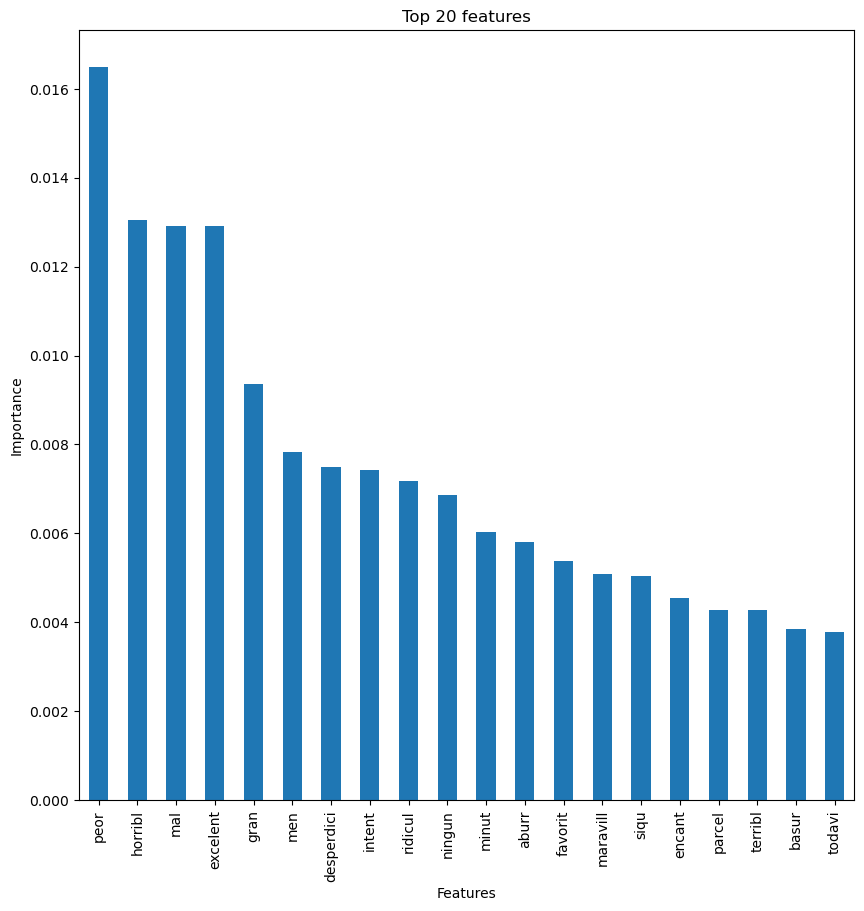

In [20]:
feat_importances = pd.Series(rf1.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='bar', figsize=(10,10))
plt.title('Top 20 features')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

## Observaciones

Podemos ver que el modelo predice correctamente el 80% de las opiniones, lo cual es un buen resultado para este tipo de problemas. Además, la se reconoce que las palabras más importantes para el modelo son adjetivos positivos y negativos, lo cual es esperado ya que estos son los que más influyen en la predicción del modelo.

Por otro lado, al encontrar los mejores hiperparametros para el modelo, se puede observar que el modelo mejora su rendimiento al aumentar la profundidad del arbol y el numero de estimadores, lo cual es esperado ya que al aumentar estos valores se aumenta la complejidad del modelo, lo cual mejora su rendimiento. Obteniendo así una mejor predicción.
